<a href="https://colab.research.google.com/github/MarianaSosaTerrazas/DIPLOMADO_CIENCIA_MATEMATICA_2024-1/blob/main/Airbnb_ProyectoMST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [7]:
df=pd.read_csv('/content/AB_NYC_2019.csv')

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
cols_cat=['name','host_name','neighbourhood_group','neighbourhood','room_type','last_review']

for col in cols_cat:
  print(f'Columna{col}:{df[col].unique()} subniveles')

Columnaname:['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"] subniveles
Columnahost_name:['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel'] subniveles
Columnaneighbourhood_group:['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] subniveles
Columnaneighbourhood:['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gow

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


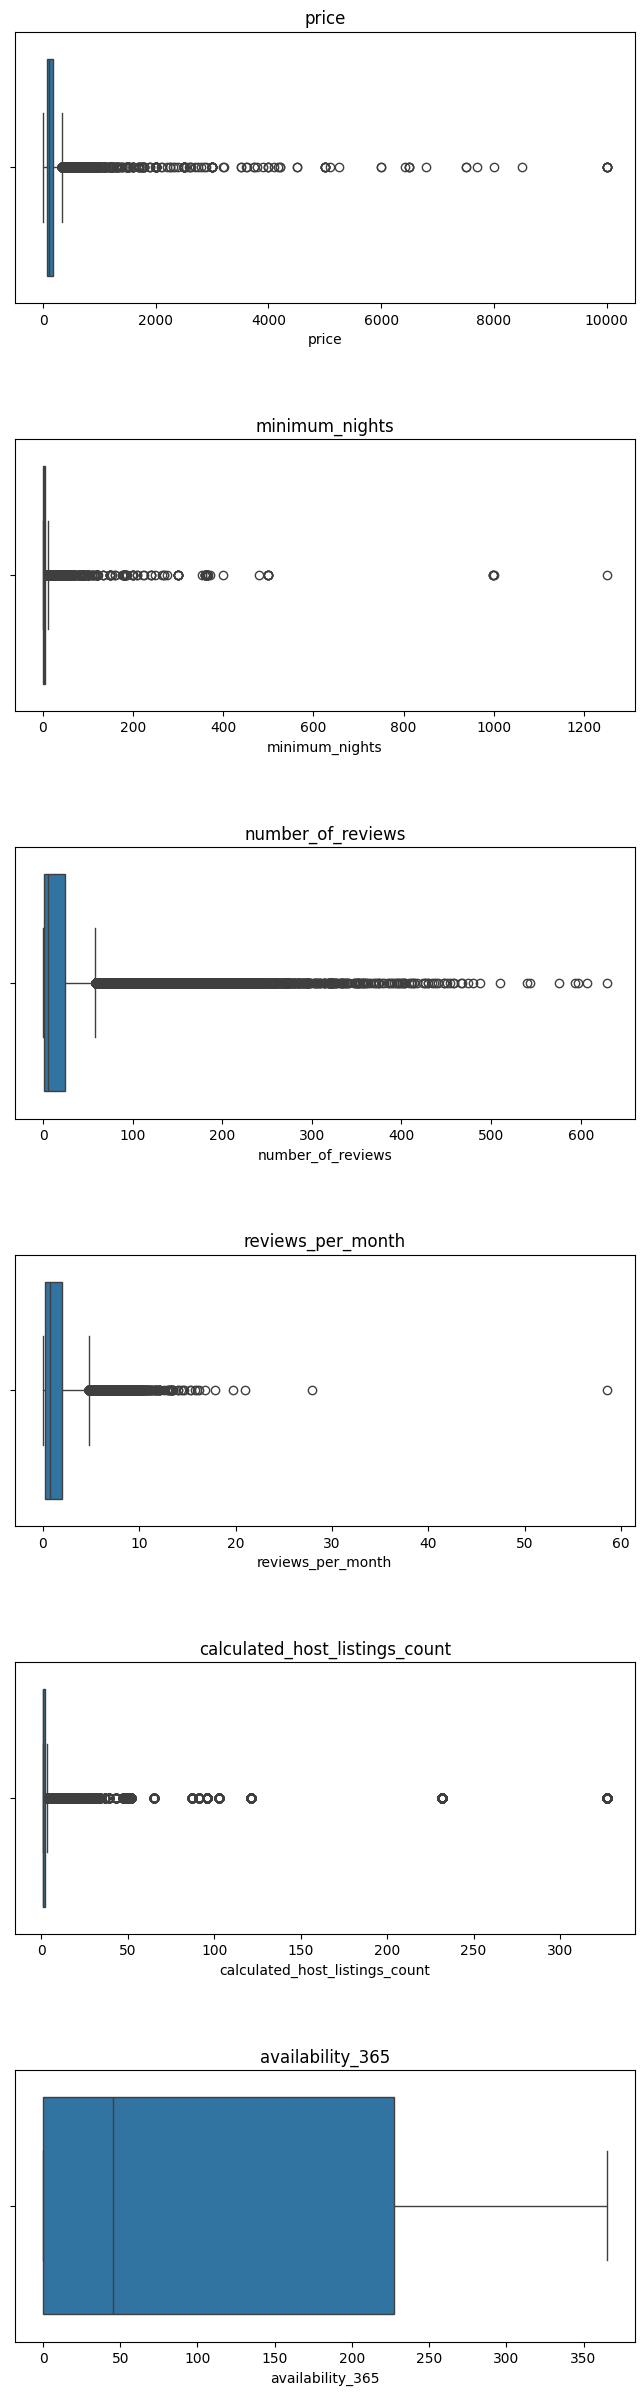

In [14]:
cols_num=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

fig, ax=plt.subplots(nrows=6, ncols=1,figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)


In [40]:
df[['availability_365']].max()

availability_365    365
dtype: int64

In [41]:
df[['availability_365']].min()

availability_365    0
dtype: int64

In [42]:
df[['availability_365']].mean()

availability_365    112.781327
dtype: float64

In [38]:
df[['reviews_per_month']].mean()

reviews_per_month    1.373221
dtype: float64

In [39]:
df[['calculated_host_listings_count']].mean()

calculated_host_listings_count    7.143982
dtype: float64

In [43]:
df[['calculated_host_listings_count']].min()

calculated_host_listings_count    1
dtype: int64

In [44]:
df[['calculated_host_listings_count']].max()

calculated_host_listings_count    327
dtype: int64

In [31]:
df_6=df[['id','name','host_name','availability_365']]
df_6

,id,name,host_name,availability_365
0,2539,Clean & quiet apt home by the park,John,365
1,2595,Skylit Midtown Castle,Jennifer,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,0
...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Sabrina,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Marisol,36
48892,36485431,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,27
48893,36485609,43rd St. Time Square-cozy single bed,Taz,2


In [32]:
df_6.groupby(['id','name','host_name']).mean('availability_365')

,,,availability_365
id,name,host_name,
2539,Clean & quiet apt home by the park,John,365.0
2595,Skylit Midtown Castle,Jennifer,355.0
3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,365.0
3831,Cozy Entire Floor of Brownstone,LisaRoxanne,194.0
5022,Entire Apt: Spacious Studio/Loft by central park,Laura,0.0
...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,Sabrina,9.0
36485057,Affordable room in Bushwick/East Williamsburg,Marisol,36.0
36485431,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,27.0


In [45]:
df_2=df.groupby(['neighbourhood_group']).count()

In [46]:
df_2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


In [47]:
df_3=df[['neighbourhood_group','reviews_per_month']]

In [48]:
df_3.groupby(['neighbourhood_group']).count()

,reviews_per_month
neighbourhood_group,
Bronx,876
Brooklyn,16447
Manhattan,16632
Queens,4574
Staten Island,314


from matplotlib import pyplot as plt
_df_0['reviews_per_month'].plot(kind='hist', bins=20, title='reviews_per_month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['reviews_per_month'].plot(kind='line', figsize=(8, 4), title='reviews_per_month')
plt.gca().spines[['top', 'right']].set_visible(False)

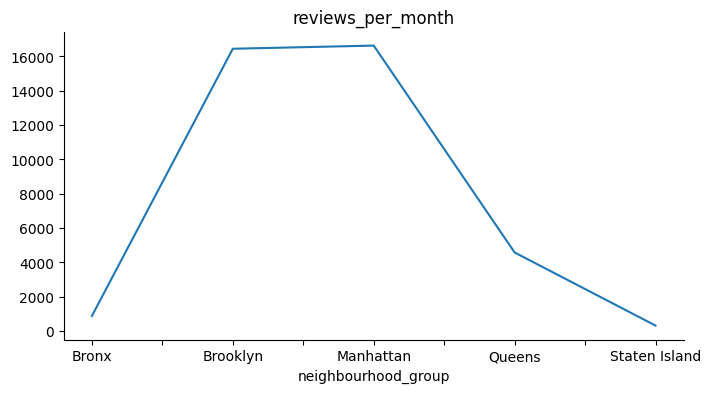

In [50]:
from matplotlib import pyplot as plt
_df_1['reviews_per_month'].plot(kind='line', figsize=(8, 4), title='reviews_per_month')
plt.gca().spines[['top', 'right']].set_visible(False)

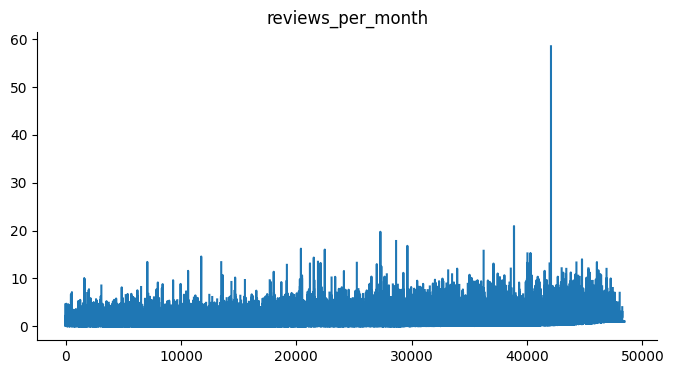

In [51]:
from matplotlib import pyplot as plt
df_3['reviews_per_month'].plot(kind='line', figsize=(8, 4), title='reviews_per_month')
plt.gca().spines[['top', 'right']].set_visible(False)

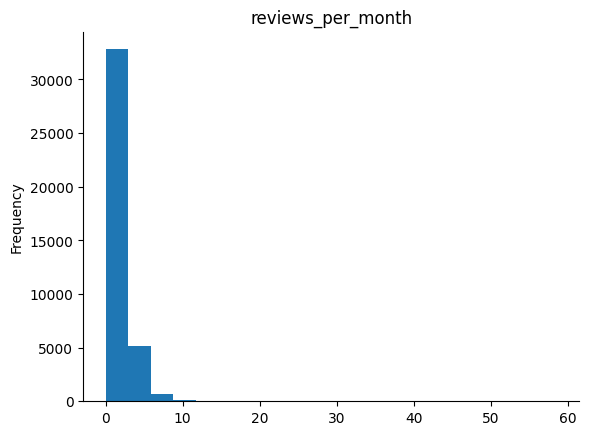

In [52]:
from matplotlib import pyplot as plt
df_3['reviews_per_month'].plot(kind='hist', bins=20, title='reviews_per_month')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
df_4=df[['room_type','price']]
df_4

,room_type,price
0,Private room,149
1,Entire home/apt,225
2,Private room,150
3,Entire home/apt,89
4,Entire home/apt,80
...,...,...
48890,Private room,70
48891,Private room,40
48892,Entire home/apt,115
48893,Shared room,55


In [54]:
df_4.groupby(['room_type']).mean('price')

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

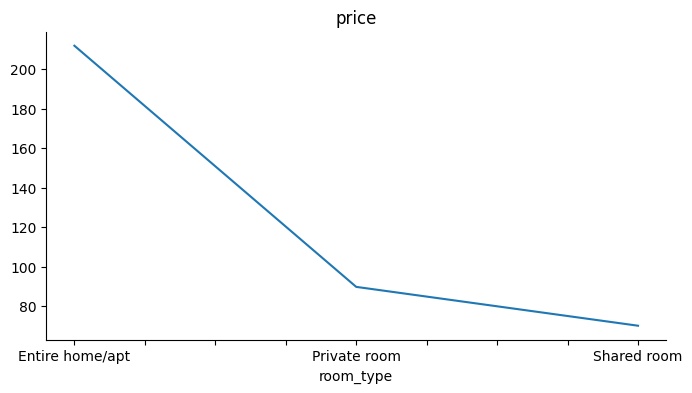

In [56]:
from matplotlib import pyplot as plt
_df_3['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

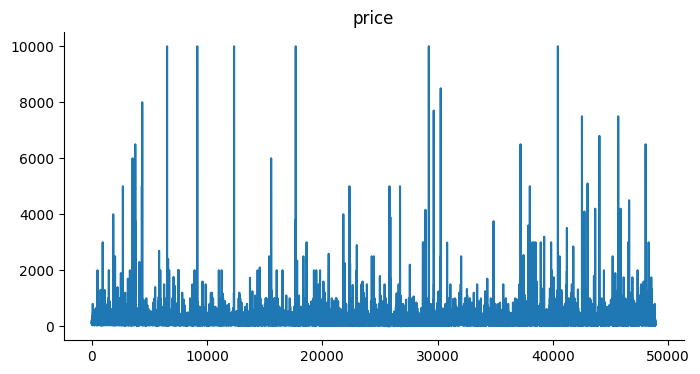

In [58]:
from matplotlib import pyplot as plt
df_4['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

**PENDIENTE HACER EL MAPA**

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

<Axes: title={'center': 'Airbnb New York'}, xlabel='longitude', ylabel='latitude'>

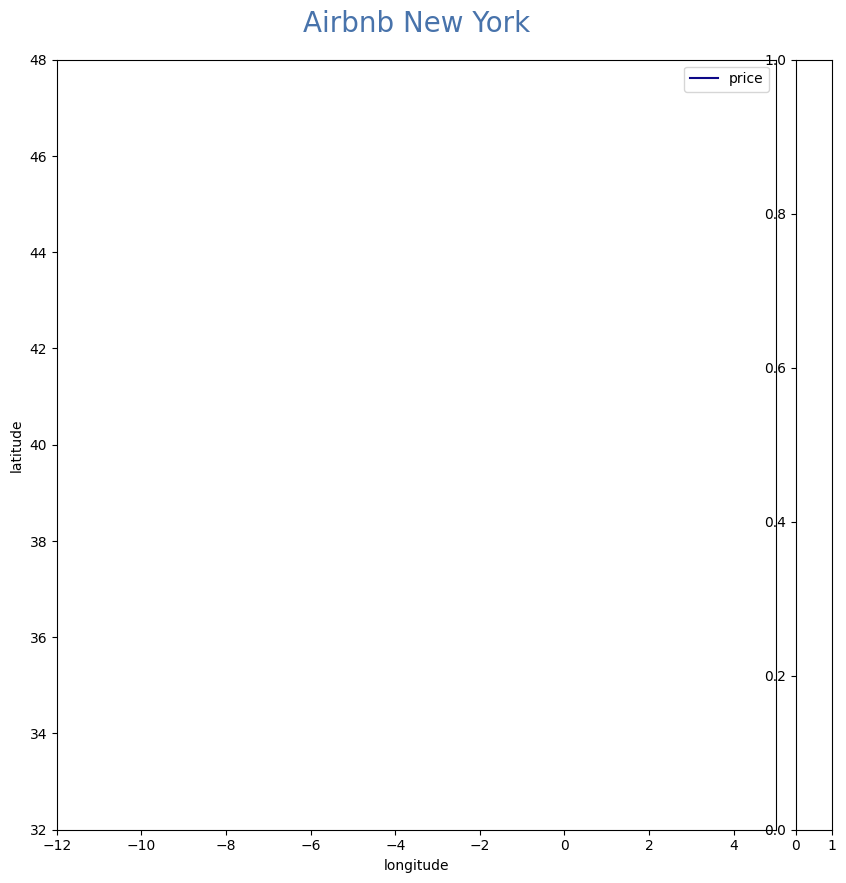

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.axis([-12, 5, 32, 48])

ax.set_title('Airbnb New York',
             pad = 20,
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

df['price'].plot(column='price', cmap='plasma', ax=ax,
              legend=True,  zorder=5)



In [9]:
import nltk

In [10]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [11]:
from nltk.corpus import movie_reviews
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import re, string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [62]:
df_5=df[['name','room_type','price','reviews_per_month']]

In [63]:
df_5

,name,room_type,price,reviews_per_month
0,Clean & quiet apt home by the park,Private room,149,0.21
1,Skylit Midtown Castle,Entire home/apt,225,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Private room,150,NaN
3,Cozy Entire Floor of Brownstone,Entire home/apt,89,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Entire home/apt,80,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Private room,70,NaN
48891,Affordable room in Bushwick/East Williamsburg,Private room,40,NaN
48892,Sunny Studio at Historical Neighborhood,Entire home/apt,115,NaN
48893,43rd St. Time Square-cozy single bed,Shared room,55,NaN


In [64]:
analyzer=SentimentIntensityAnalyzer()

In [65]:
texts=df_5[['name']]

In [66]:
texts

,name
0,Clean & quiet apt home by the park
1,Skylit Midtown Castle
2,THE VILLAGE OF HARLEM....NEW YORK !
3,Cozy Entire Floor of Brownstone
4,Entire Apt: Spacious Studio/Loft by central park
...,...
48890,Charming one bedroom - newly renovated rowhouse
48891,Affordable room in Bushwick/East Williamsburg
48892,Sunny Studio at Historical Neighborhood
48893,43rd St. Time Square-cozy single bed


In [77]:
name_airbnb=df['name'].values.tolist()

In [78]:
name_airbnb

['Clean & quiet apt home by the park',
 'Skylit Midtown Castle',
 'THE VILLAGE OF HARLEM....NEW YORK !',
 'Cozy Entire Floor of Brownstone',
 'Entire Apt: Spacious Studio/Loft by central park',
 'Large Cozy 1 BR Apartment In Midtown East',
 'BlissArtsSpace!',
 "Large Furnished Room Near B'way ",
 'Cozy Clean Guest Room - Family Apt',
 'Cute & Cozy Lower East Side 1 bdrm',
 'Beautiful 1br on Upper West Side',
 'Central Manhattan/near Broadway',
 'Lovely Room 1, Garden, Best Area, Legal rental',
 'Wonderful Guest Bedroom in Manhattan for SINGLES',
 'West Village Nest - Superhost',
 'Only 2 stops to Manhattan studio',
 'Perfect for Your Parents + Garden',
 'Chelsea Perfect',
 'Hip Historic Brownstone Apartment with Backyard',
 'Huge 2 BR Upper East  Cental Park',
 'Sweet and Spacious Brooklyn Loft',
 'CBG CtyBGd HelpsHaiti rm#1:1-4',
 'CBG Helps Haiti Room#2.5',
 'CBG Helps Haiti Rm #2',
 'MAISON DES SIRENES1,bohemian apartment',
 'Sunny Bedroom Across Prospect Park',
 'Magnifique Suite a

In [95]:
comments=[]
for comment in df['name']:
  comments.append(list(word_tokenize(str(comment).lower())))
comments[0]

['clean', '&', 'quiet', 'apt', 'home', 'by', 'the', 'park']

In [96]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [97]:
all_words=list(get_all_words(comments))
all_words

['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'by',
 'the',
 'park',
 'skylit',
 'midtown',
 'castle',
 'the',
 'village',
 'of',
 'harlem',
 '....',
 'new',
 'york',
 '!',
 'cozy',
 'entire',
 'floor',
 'of',
 'brownstone',
 'entire',
 'apt',
 ':',
 'spacious',
 'studio/loft',
 'by',
 'central',
 'park',
 'large',
 'cozy',
 '1',
 'br',
 'apartment',
 'in',
 'midtown',
 'east',
 'blissartsspace',
 '!',
 'large',
 'furnished',
 'room',
 'near',
 "b'way",
 'cozy',
 'clean',
 'guest',
 'room',
 '-',
 'family',
 'apt',
 'cute',
 '&',
 'cozy',
 'lower',
 'east',
 'side',
 '1',
 'bdrm',
 'beautiful',
 '1br',
 'on',
 'upper',
 'west',
 'side',
 'central',
 'manhattan/near',
 'broadway',
 'lovely',
 'room',
 '1',
 ',',
 'garden',
 ',',
 'best',
 'area',
 ',',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'in',
 'manhattan',
 'for',
 'singles',
 'west',
 'village',
 'nest',
 '-',
 'superhost',
 'only',
 '2',
 'stops',
 'to',
 'manhattan',
 'studio',
 'perfect',
 'for',
 'your',
 'pare

In [98]:
WF=nltk.FreqDist(all_words)
WFdf=pd.DataFrame(WF.most_common(30))
WFdf.columns=['Word','Count']

fig=px.bar(WFdf, x='Count', y ='Word', orientation='h',text='Count', width=1000, height=750,
           template='plotly_white',title='Word Count-1')

fig.show()

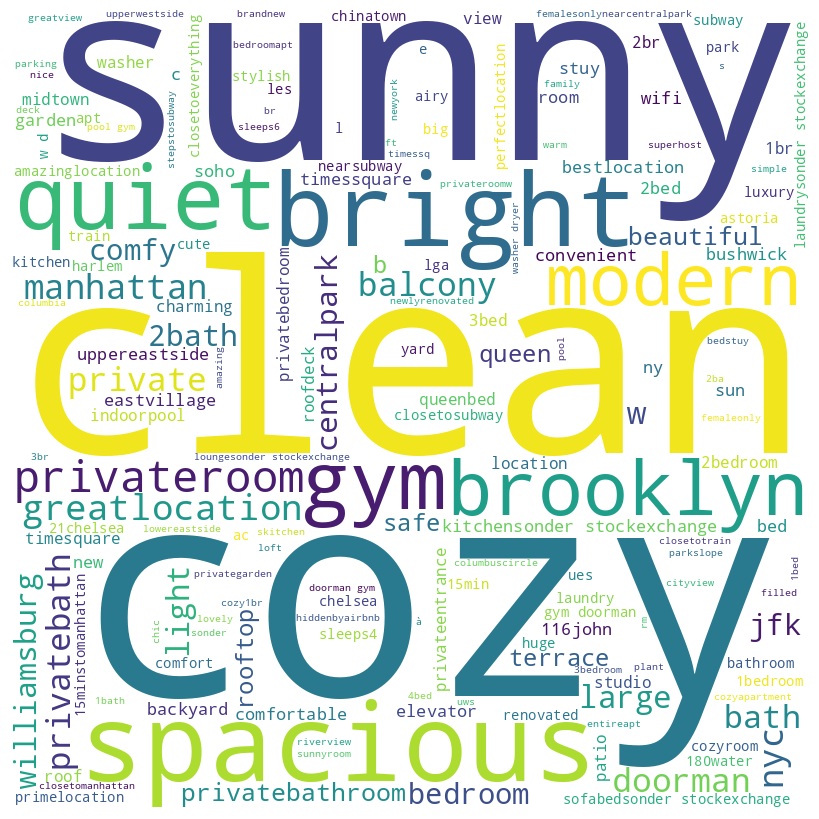

In [99]:
comment_word=''
comment_word+=''.join(all_words)+''

wordcloud=WordCloud(width=800, height=800,
                    background_color='white',
                    min_font_size=10).generate(comment_word)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [100]:
for text in name_airbnb:
  scores=analyzer.polarity_scores(text)
  print(text)
  print(scores)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Comfortable Cozy Space in El Barrio
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
Sunny Bklyn Jewel  Fort Greene JULY  - AUG 2019
{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6486}
MANHATTAN Neat, Nice, Bright ROOM
{'neg': 0.0, 'neu': 0.187, 'pos': 0.813, 'compound': 0.8271}
Bienvenue
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Large Brand New Park Slope 1BR
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Colorful Artistic Williamsburg Apt
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
UWS Brownstone Near Central Park
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Artsy TopFloor Apt in PRIME BEDFORD Williamsburg
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2 BR w/ Terrace @ Box House Hotel
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
BOHEMIAN EAST VILLAGE 2 BED HAVEN
{'neg': 0.0, 'neu': 1.0, 'po

AttributeError: 'float' object has no attribute 'encode'

In [5]:
!pip install tensorflow==2.13.0

In [12]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
fig = px.histogram(df, x = 'price', nbins = 30, title = 'Airbnb Prices')
fig.update_layout(xaxis_title = 'Price', yaxis_title = 'Frequency', template = 'plotly_white', bargap = 0.2)
fig.show()

In [23]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
df_8=df[['id','host_id','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [27]:
df_8

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


In [28]:
corr_matrix = df_8.corr()
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale = 'RdBu',  range_color=[-1,1], text_auto = True, aspect = "auto")
fig.update_layout(title='Correlation Heatmap')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [33]:
X = df_8.drop('price', axis=1)
y = df_8['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
svm = SVR()
svm.fit(X_train_scaled, y_train)

ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [38]:
y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm:.2f}")

NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
svm_r2 = r2_score(y_test, y_pred_svm)
print(f"SVM R^2 Score: {svm_r2:.2f}")

NameError: name 'y_pred_svm' is not defined

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

In [ ]:
svm = SVR()
grid_search_svm = GridSearchCV(estimator = svm, param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)